In [1]:
#importing necessary libraries
import tensorflow as tf
from tensorflow.keras import models,layers,datasets
from tensorflow.keras.optimizers import SGD

In [2]:
#loading the dataset
(x_train,y_train), (x_test,y_test) = datasets.cifar10.load_data()

In [3]:
#displaying the shape of the training and testing datasets
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [4]:
#points in 0-1
x_train = x_train/255.0
x_test = x_test/255.0
print(x_train.shape)
print(x_test.shape)

#reshaping the datasets
x_train=x_train.reshape(-1,32*32*3)
x_test=x_test.reshape(-1,32*32*3)
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 3072)
(10000, 3072)


In [5]:


# One-hot encoding is a way of representing categorical data in a binary 
#format suitable for machine learning models, especially in classification tasks.
#In this encoding, each class or category is represented by a binary vector where:

# The vector length equals the number of classes. Only one element is "1" (hot),
#corresponding to the class label, while all other elements are "0". For instance, 
#in CIFAR-10, which has 10 classes, the labels for classes might look like this
#after one-hot encoding:

# Class Label One-Hot Encoded Label Airplane 0 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0] 
#Automobile 1 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] Bird 2 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
#... ... ... Truck 9 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1] Why One-Hot Encoding is Used Here 
# In a classification task where we use categorical cross-entropy loss, one-hot encoding 
# is necessary for several reasons:

# Compatibility with Loss Function: Categorical cross-entropy loss calculates the 
# difference between the predicted probabilities and the actual labels. It requires
# the true labels to be in one-hot format to perform a comparison across all classes simultaneously.


In [6]:

x_train[0]

array([0.23137255, 0.24313725, 0.24705882, ..., 0.48235294, 0.36078431,
       0.28235294])

In [7]:
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

In [8]:
model = models.Sequential()
model.add(layers.Dense(128,activation='relu',input_shape=(32*32*3,)))
model.add(layers.Dense(64,activation = 'relu',))
model.add(layers.Dense(10,activation = 'softmax'))


C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer=SGD(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])

history=model.fit(x_train,y_train,batch_size=32,epochs=30)

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2669 - loss: 2.0114
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3831 - loss: 1.7358
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4154 - loss: 1.6509
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4380 - loss: 1.5887
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4535 - loss: 1.5450
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4659 - loss: 1.5050
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4762 - loss: 1.4791
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4853 - loss: 1.4483
Epoch 9/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4924 - loss: 1.4241
Epoch 10/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5029 - loss: 1.4056
Epoch 11/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5083 - loss: 1.3809
Epoch 12/30
1563/1563 ━━━━━━━━

In [10]:
test_loss,test_acc = model.evaluate(x_test,y_test)
print(test_loss)
print(test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - accuracy: 0.5389 - loss: 1.3253
1.3307106494903564
0.5314000248908997


In [11]:
predict_value = model.predict(x_test)  

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step


In [14]:
x_test = x_test.reshape(-1,32,32,3)

[0.13301702 0.16817637 0.0183479  0.0138954  0.01834573 0.00385513
 0.00851704 0.00245199 0.6291328  0.00426049]


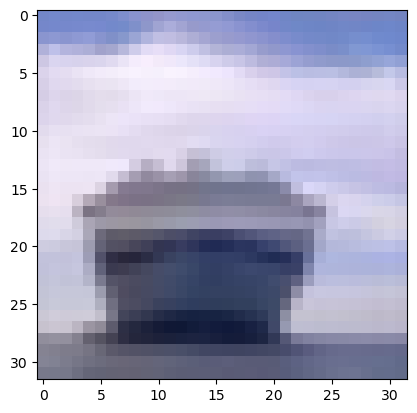

In [16]:
import matplotlib.pyplot as plt
import random

n =  random.randint(0,len(x_test)-1)
plt.imshow(x_test[n])
print(predict_value[n])


In [18]:
#cifar-10 class names
class_names = ["airplan","automobile","birds","cat","deer","dog","frog","hourse","ship","truck"]


In [20]:
import numpy as np
predicted_class = np.argmax(predict_value[n])  #get the index of highest probability
predicated_class_name = class_names[predicted_class] #map to class name

#display the predicated class name
print("predicated class: ",predicated_class_name)

predicated class:  ship
